In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
project_path = "/global/cfs/cdirs/des/zhou/spt_lensing/"
import os
import seaborn as sns
sns.set_theme()
sns.set_style('ticks')
sns.set(rc = {'figure.figsize':(15,8)})

In [7]:
spt_rel_path = "spt_data/redmapperY3-SPTconf.fits"
spt_path = os.path.join(project_path,spt_rel_path)

In [24]:
from astropy.io import fits
spt_rec = fits.open(spt_path)[1].data

In [25]:
spt_rec.columns

ColDefs(
    name = 'MEM_MATCH_ID'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'MODEL_MAG'; format = '4E'
    name = 'MODEL_MAGERR'; format = '4E'
    name = 'REFMAG'; format = 'E'
    name = 'REFMAG_ERR'; format = 'E'
    name = 'ZRED'; format = 'E'
    name = 'ZRED_E'; format = 'E'
    name = 'ZRED_CHISQ'; format = 'E'
    name = 'BCG_SPEC_Z'; format = 'E'
    name = 'Z_SPEC_INIT'; format = 'E'
    name = 'Z_INIT'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'LAMBDA_CHISQ'; format = 'E'
    name = 'LAMBDA_CHISQ_E'; format = 'E'
    name = 'LAMBDA_ZRED'; format = 'E'
    name = 'LAMBDA_ZRED_E'; format = 'E'
    name = 'R_LAMBDA'; format = 'E'
    name = 'SCALEVAL'; format = 'E'
    name = 'MASKFRAC'; format = 'E'
    name = 'GEOMASKFRAC'; format = 'E'
    name = 'C_LAMBDA'; format = '3E'
    name = 'C_LAMBDA_ERR'; format = '3E'
    name = 'MAG_LAMBDA_ERR'; format = '4E'
    name = 'CHISQ'; format = 'E'
    name = 'Z_LAMBDA'; format = 

In [29]:
columns_to_use = ['MEM_MATCH_ID', 'RA', 'DEC', 'Z_LAMBDA', 'SPT-FIELD-DEPTH', 'SPT-SIGNIF', 'LAMBDA_CHISQ']

In [35]:
spt_df = pd.DataFrame()

In [84]:
for column in columns_to_use:
    spt_df[column] = spt_rec[column].newbyteorder().byteswap()

In [85]:
spt_df

,MEM_MATCH_ID,RA,DEC,Z_LAMBDA,SPT-FIELD-DEPTH,SPT-SIGNIF,LAMBDA_CHISQ
0,1,43.564579,-58.952959,0.426082,1.247992,14.134479,221.674240
1,2,83.231902,-37.026689,0.283338,-0.880000,14.373465,199.432495
2,3,347.092550,-2.192137,0.292506,0.000000,0.000000,163.583298
3,4,79.155685,-54.500459,0.298755,1.326782,12.412354,207.243042
4,5,343.585508,-46.346819,0.270096,1.186494,8.369026,168.159790
...,...,...,...,...,...,...,...
21087,151926,71.763570,-38.590562,0.631790,-0.880000,0.000000,20.796743
21088,164756,327.689103,0.129851,0.153208,0.000000,0.000000,20.003485
21089,168894,356.838533,-65.127743,0.716326,1.176285,0.000000,20.491644
21090,174734,28.059007,-41.179743,0.901921,1.191644,0.000000,25.388491


In [86]:
halo_df_path = os.path.join(project_path,"data/lambda_spt_combined.pkl")
halo_df = pd.read_pickle(halo_df_path)

In [87]:
halo_df

,R_lambda_60,lambda_60,R_lambda_30_noperc,lambda_30_noperc,R_lambda_30,lambda_30,R_lambda_15,lambda_15,R_lambda_1,lambda_1,...,pos_y,pos_z,mean_ln_zeta,mean_ln_lambda,zeta,xi,xi_gt_45,xi_gt_5,zeta_gt_2,select
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415.166016,856.251831,-8.618753,None,0.000188,4.178435,0.0,0.0,0.0,0.0
1,0.495934,3.0,0.525306,4.0,0.495934,3.0,0.495934,3.0,0.495934,3.0,...,414.536774,856.803711,-4.997203,None,0.006090,0.965050,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415.929810,856.218750,-7.717088,None,0.000589,3.032619,0.0,0.0,0.0,0.0
3,0.525306,4.0,0.525306,4.0,0.525306,4.0,0.525306,4.0,0.525306,4.0,...,416.008942,856.025208,-6.653800,None,0.001281,2.686348,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,416.560669,855.756653,-8.724588,None,0.000172,1.018350,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,561.514404,888.496399,-9.094530,None,0.000094,1.446782,0.0,0.0,0.0,0.0
9859096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,560.016357,882.976013,-8.724588,None,0.000202,0.982131,0.0,0.0,0.0,0.0
9859099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,571.308411,854.020569,-8.961055,None,0.000121,3.074231,0.0,0.0,0.0,0.0
9859102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,564.850891,851.839539,-10.646326,None,0.000024,0.810190,0.0,0.0,0.0,0.0


In [88]:
sns.set_style('ticks')

In [ ]:
z_mask = (spt_df['Z_LAMBDA'] > 0.25) & (spt_df['Z_LAMBDA']<0.35)
spt_df = spt_df[z_mask]

In [89]:
abacus_spt_select_mask = halo_df['select']==1
abacus_spt_non_select_mask = (halo_df['select'] == 0) & (halo_df['zeta_gt_2'])
spt_no_observation_mask = spt_df['SPT-FIELD-DEPTH']==0
spt_non_det_mask = (spt_df['SPT-FIELD-DEPTH']!= 0) & (spt_df['SPT-SIGNIF'] == 0)
spt_det_mask = (spt_df['SPT-FIELD-DEPTH'] != 0 ) & (spt_df['SPT-SIGNIF'] != 0)

In [118]:
np.sum(spt_non_det_mask)

14729

<ipython-input-120-86eab113b7d3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(spt_df[spt_no_observation_mask]['SPT-SIGNIF'],spt_df[spt_no_observation_mask]['LAMBDA_CHISQ'],label="SPT No Observation",
<ipython-input-120-86eab113b7d3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(spt_df[spt_non_det_mask]['SPT-SIGNIF'],spt_df[spt_non_det_mask]['LAMBDA_CHISQ'],label="SPT Non Detected",
<ipython-input-120-86eab113b7d3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(spt_df[spt_det_mask]['SPT-SIGNIF'],spt_df[spt_det_mask]['LAMBDA_CHISQ'],label="SPT Detected",


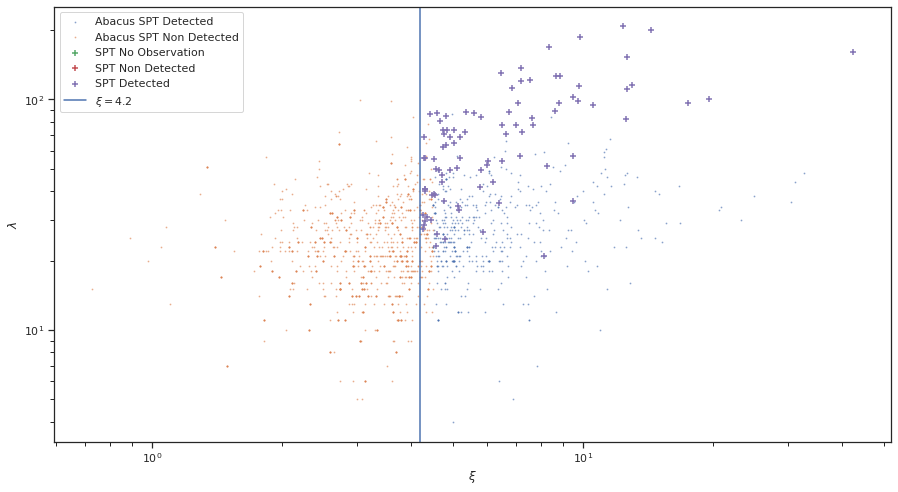

In [120]:
fig, ax = plt.subplots()
ax.scatter(halo_df[abacus_spt_select_mask]['xi'],halo_df[abacus_spt_select_mask]['lambda_30'],label="Abacus SPT Detected",
          alpha=0.5,s=0.8)
ax.scatter(halo_df[abacus_spt_non_select]['xi'],halo_df[abacus_spt_non_select]['lambda_30'],label="Abacus SPT Non Detected",
          alpha=0.5,s=0.8)
ax.scatter(spt_df[spt_no_observation_mask]['SPT-SIGNIF'],spt_df[spt_no_observation_mask]['LAMBDA_CHISQ'],label="SPT No Observation",
          alpha=1, marker = '+')
ax.scatter(spt_df[spt_non_det_mask]['SPT-SIGNIF'],spt_df[spt_non_det_mask]['LAMBDA_CHISQ'],label="SPT Non Detected",
          alpha=1, marker = '+')
ax.scatter(spt_df[spt_det_mask]['SPT-SIGNIF'],spt_df[spt_det_mask]['LAMBDA_CHISQ'],label="SPT Detected",
          alpha=1, marker = '+')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(4.2,label=r"$\xi = 4.2$")
ax.set_ylabel(r'$\lambda$')
ax.set_xlabel(r'$\xi$')
ax.legend()

In [112]:
spt_df[spt_non_det_mask]['SPT-SIGNIF']

19       0.0
55       0.0
66       0.0
68       0.0
78       0.0
        ... 
21085    0.0
21087    0.0
21089    0.0
21090    0.0
21091    0.0
Name: SPT-SIGNIF, Length: 14729, dtype: float32